In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [3]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [4]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제적용
model.add(keras.layers.Dense(10,activation='softmax'))

c:\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마 loss,accuracy 값을 저장
# train_scaled,val_scaled 함께 훈련시킴.
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7301 - loss: 0.7617 - val_accuracy: 0.8458 - val_loss: 0.4371
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8378 - loss: 0.4522 - val_accuracy: 0.8627 - val_loss: 0.3846
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8513 - loss: 0.4124 - val_accuracy: 0.8645 - val_loss: 0.3715
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8617 - loss: 0.3769 - val_accuracy: 0.8754 - val_loss: 0.3455
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8685 - loss: 0.3626 - val_accuracy: 0.8713 - val_loss: 0.3458
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8715 - loss: 0.3538 - val_accuracy: 0.8686 - val_loss: 0.3618
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8680 - loss: 0.3493 - val_accuracy: 0.8774 - val_loss: 0.3372
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8771 - loss: 0.3329 - 

Text(0, 0.5, 'loss')

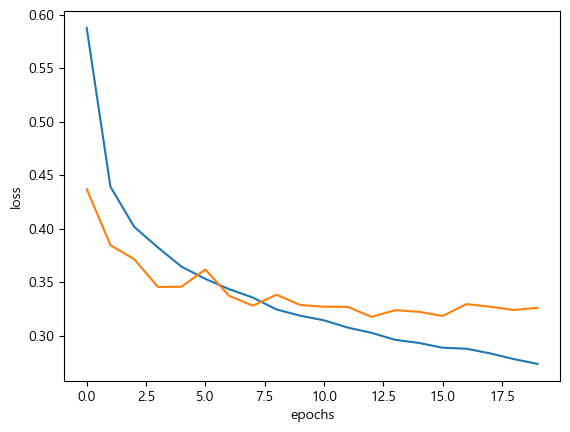

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

콜백

In [9]:
# 손실률이 가장 낮은 위치의 모델을 저장시켜줌.
# 확장자 h5, keras확장자명 변경
# epochs를 20번 돌때 가장 좋은 모델을 저장시켜줌.
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb] )

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8957 - loss: 0.2744 - val_accuracy: 0.8890 - val_loss: 0.3220
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8974 - loss: 0.2686 - val_accuracy: 0.8879 - val_loss: 0.3224
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9030 - loss: 0.2596 - val_accuracy: 0.8891 - val_loss: 0.3209
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9024 - loss: 0.2592 - val_accuracy: 0.8849 - val_loss: 0.3335
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9024 - loss: 0.2563 - val_accuracy: 0.8885 - val_loss: 0.3298
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9069 - loss: 0.2501 - val_accuracy: 0.8811 - val_loss: 0.3287
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9022 - loss: 0.2557 - val_accuracy: 0.8883 - val_loss: 0.3199
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9069 - loss: 0.2474 - 

In [10]:
model = keras.models.load_model('best_model.keras')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8890 - loss: 0.3365


[0.3446897864341736, 0.8884166479110718]

콜백

In [11]:
# 11번쨰가 가장 좋을 때 20번까지 실행을 시킬 필요가 없음 
# 조기 종료
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# ModelCheckpoint : 가장 손실률이 낮은 모델을 저장 
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기종료 
# patience=2 손실값이 2번이상 증가되면 종료 
# restore_best_weights=True 뒤로 back을 해서 가장 좋은 모델의 위치 
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb] )

NameError: name 'model' is not defined